# Welcome to the Journey!

In [1]:
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob
import ccdproc

from astropy.nddata import CCDData
from astropy import units as u

In [34]:
?CCDData

# First do everything the hard way

In [2]:
biases = glob.glob('/Users/admin/Astr_480/Reduction/Wolf1346/bias.*')
flats = glob.glob('/Users/admin/Astr_480/Reduction/Wolf1346/flat.*')
other = glob.glob('/Users/admin/Astr_480/Reduction/Wolf1346/wolf*')
other

['/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0001.fits',
 '/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_m.0001.fits',
 '/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0002.fits',
 '/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0003.fits']

In [3]:
bias1 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0015.fits').astype(np.int32)
bias2 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0014.fits').astype(np.int32)
bias3 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0013.fits').astype(np.int32)
bias4 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0009.fits').astype(np.int32)
bias5 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0008.fits').astype(np.int32)
bias6 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0012.fits').astype(np.int32)
bias7 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0011.fits').astype(np.int32)
bias8 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0007.fits').astype(np.int32)
bias9 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0006.fits').astype(np.int32)
bias10 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0010.fits').astype(np.int32)
bias11 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/bias.0016.fits').astype(np.int32)

In [4]:
#average everthing
np.average(bias11)

351.4999043883874

In [5]:
master_bias = (bias1+bias2+bias3+bias4+bias5+bias6+bias7+bias8+bias9+bias10+bias11)/11

In [6]:
np.average(master_bias)

351.60790918162616

In [7]:
print(master_bias.shape)
print('')
print(master_bias)

(2050, 2102)

[[ 317.27272727  315.90909091 1549.45454545 ... 1106.27272727
   338.54545455  338.54545455]
 [ 303.45454545  302.          333.45454545 ...  342.
   309.09090909  309.36363636]
 [ 313.63636364  311.63636364  342.         ...  349.54545455
   316.72727273  316.81818182]
 ...
 [ 318.36363636  316.36363636  347.63636364 ...  350.
   318.54545455  319.27272727]
 [ 306.09090909  306.18181818  335.81818182 ...  340.09090909
   307.90909091  308.27272727]
 [ 327.09090909  327.18181818 1315.63636364 ... 1637.36363636
   333.18181818  333.90909091]]


In [8]:
img1 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0001.fits').astype(np.int32)
img2 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0002.fits').astype(np.int32)
img3 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_.0003.fits').astype(np.int32)
img4 = fits.getdata('/Users/admin/Astr_480/Reduction/Wolf1346/wolf1346_m.0001.fits').astype(np.int32)

In [9]:
# Remove the bias
no_mo_b1 = img1 - master_bias
no_mo_b2 = img2 - master_bias
no_mo_b3 = img3 - master_bias
no_mo_b4 = img4 - master_bias

# Overscan time

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


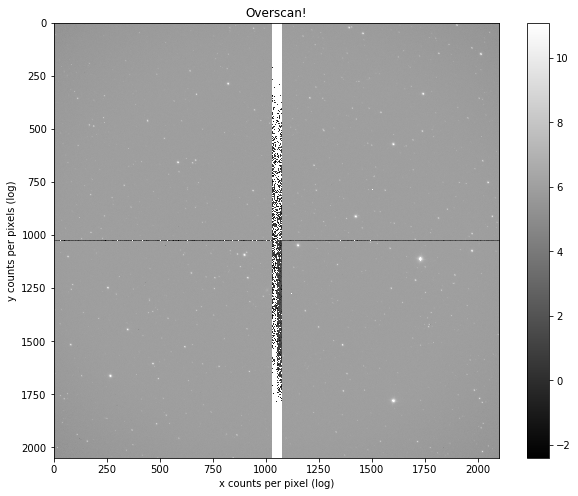

In [10]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(no_mo_b2), cmap='binary_r')

plt.title('Overscan!')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

In [11]:
no_mo_b1.shape

(2050, 2102)

In [12]:
#Remove overscan
no_mo_bo = np.delete(no_mo_b1, np.s_[1023:1025], 0)
no_mo_bo1 = np.delete(no_mo_bo, np.s_[1025:1075], 1)

no_mo_bo2 = np.delete(no_mo_b2, np.s_[1023:1025], 0)
no_mo_bo2 = np.delete(no_mo_bo2, np.s_[1025:1075], 1)

no_mo_bo3 = np.delete(no_mo_b3, np.s_[1023:1025], 0)
no_mo_bo3 = np.delete(no_mo_bo3, np.s_[1025:1075], 1)

no_mo_bo4 = np.delete(no_mo_b4, np.s_[1023:1025], 0)
no_mo_bo4 = np.delete(no_mo_bo4, np.s_[1025:1075], 1)

In [13]:
no_mo_bo1.shape, no_mo_bo2.shape, no_mo_bo3.shape, no_mo_bo4.shape

((2048, 2052), (2048, 2052), (2048, 2052), (2048, 2052))

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


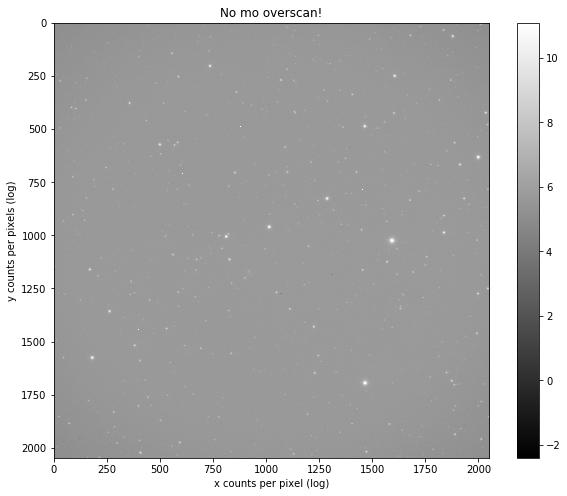

In [14]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(no_mo_bo1), cmap=plt.cm.gray)

plt.title('No mo overscan!')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

# Let's play what filter

In [15]:
#Reuse stuff by Meredith cause they've grown our toolbox!!

filtr = []
name = []

for filename in flats:
    # Open the FITS file
    hdu = fits.open(filename)
    
    filtr = hdu[0].header['FILTER']
    print('Filter {} '.format(filtr))
    
    name = hdu[0].header['FILENAME']
    print('Name: {}'.format(name))
    
filtr = np.array(filtr)
name = np.array(name)

Filter J-C Rc 
Name: flat.0031.fits
Filter J-C Rc 
Name: flat.0027.fits
Filter Wash M 
Name: flat.0007.fits
Filter Wash M 
Name: flat.0011.fits
Filter Wash M 
Name: flat.0010.fits
Filter Wash M 
Name: flat.0006.fits
Filter J-C Rc 
Name: flat.0026.fits
Filter J-C Rc 
Name: flat.0030.fits
Filter J-C Rc 
Name: flat.0040.fits
Filter J-C Rc 
Name: flat.0017.fits
Filter J-C Rc 
Name: flat.0037.fits
Filter J-C Rc 
Name: flat.0021.fits
Filter J-C Rc 
Name: flat.0020.fits
Filter J-C Rc 
Name: flat.0036.fits
Filter Wash M 
Name: flat.0016.fits
Filter J-C Rc 
Name: flat.0041.fits
Filter J-C Rc 
Name: flat.0039.fits
Filter Wash M 
Name: flat.0015.fits
Filter J-C Rc 
Name: flat.0023.fits
Filter J-C Rc 
Name: flat.0035.fits
Filter J-C Rc 
Name: flat.0019.fits
Filter J-C Rc 
Name: flat.0018.fits
Filter J-C Rc 
Name: flat.0034.fits
Filter J-C Rc 
Name: flat.0022.fits
Filter Wash M 
Name: flat.0014.fits
Filter J-C Rc 
Name: flat.0038.fits
Filter J-C Rc 
Name: flat.0025.fits
Filter J-C Rc 
Name: flat.00

In [16]:
Wash = []
JC = []

for filename in flats:
    hdu = fits.open(filename)
    
    filters = hdu[0].header['FILTER']
    if filters == 'Wash M':
        Wash.append(filename)
    else:
        JC.append(filename)
    
Wash = np.array(Wash)
JC = np.array(JC)

In [17]:
#Realize you haven't been using ccdproc and hate yourself (just a little)
master_Wash = CCDData(Wash, unit=u.electron)
master_JC = CCDData(JC, unit=u.electron)


In [18]:
#Hmm.. This wasn't the output I was looking for lets make functions.

In [19]:
#Or give up on everything and ask Meredith for help!
def combine_biases(bias_path):
    '''Makes a master bias to be subtracted from your image.'''
    bias_list = glob.glob(bias_path)
    data = [fits.getdata(bias).astype(np.int32) for bias in bias_list]
    master_bias = np.median(data, axis=0)
    return master_bias

In [20]:
master_b = combine_biases('/Users/admin/Astr_480/Reduction/Wolf1346/bias.*')

In [21]:
#Slightly different likely due to the use of median in the functions, but it looks pretty good!
double_check = img1 - master_b
np.average(double_check), np.average(no_mo_b1)

(292.319036457729, 292.19978082324747)

In [22]:
double_check2 = img4 - master_b

In [23]:
trimmed = np.delete(double_check, np.s_[1022:1026], 0)
trimmed = np.delete(trimmed, np.s_[1025:1075], 1)

trimmed_W = np.delete(double_check2, np.s_[1022:1026], 0)
trimmed_W = np.delete(trimmed_W, np.s_[1025:1075], 1)

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


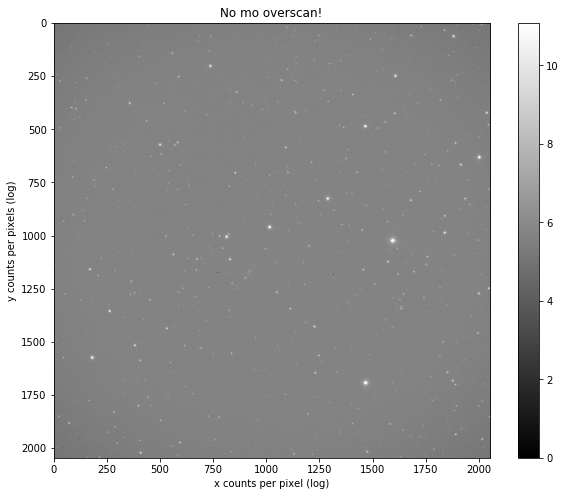

In [24]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(trimmed), cmap=plt.cm.gray)

plt.title('No mo overscan!')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

In [25]:
def combine_flats(flat_list):
    '''Makes a normalized array to use as a master flat to divide out of your image.
    Change list to path and uncomment the next line if your files arent already globbed.'''
    #flat_list = glob.glob(flat_path)
    data = [fits.getdata(flat).astype(np.int32) for flat in flat_list]
    master_flat = np.median(data, axis=0)/np.average(data)
    return master_flat

In [26]:
master_JC = combine_flats(JC)
master_Wash = combine_flats(Wash)
master_JC

array([[0.11205848, 0.11194095, 0.67161633, ..., 0.78576084, 0.14984222,
        0.14784432],
       [0.00937248, 0.0093431 , 0.50940478, ..., 0.55385797, 0.00901991,
        0.00907868],
       [0.00975443, 0.00969567, 0.51269544, ..., 0.55362293, 0.00931372,
        0.00925496],
       ...,
       [0.00954877, 0.00969567, 0.61687985, ..., 0.57169214, 0.00937248,
        0.00954877],
       [0.00937248, 0.00940186, 0.60715479, ..., 0.57348437, 0.00928434,
        0.00940186],
       [0.10776887, 0.10671116, 0.75261927, ..., 0.72570643, 0.12081396,
        0.11928616]])

In [27]:
trimmed_JC = np.delete(master_JC, np.s_[1022:1026], 0)
trimmed_JC = np.delete(trimmed_JC, np.s_[1025:1075], 1)

trimmed_Wash = np.delete(master_Wash, np.s_[1022:1026], 0)
trimmed_Wash = np.delete(trimmed_Wash, np.s_[1025:1075], 1)

In [28]:
#Choose an image and divide out it's filter!
no_biases = trimmed/trimmed_JC

no_Wash = trimmed_W/trimmed_Wash

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


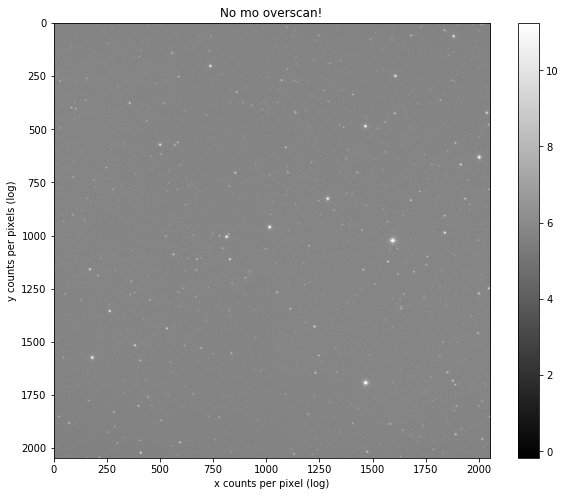

In [29]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(no_biases), cmap=plt.cm.gray)

plt.title('No mo overscan!')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

/anaconda3/envs/astroconda/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


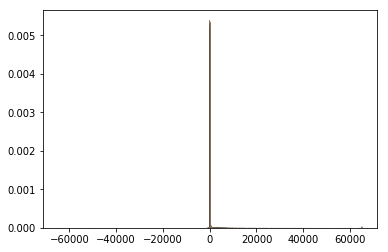

In [30]:
#To set the radius we need the fwhm of a star. So, try it this way then use DS9 to find an 
#fwhm of ~3 pixels
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=700)

plt.hist(double_check, **kwargs);

In [31]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import find_peaks

In [32]:
# First find background noises
mean, median, std = sigma_clipped_stats(no_biases, sigma=3.0)
print(mean, median, std)

320.97846041745555 321.2593549973777 16.388051935005652


In [33]:
# Find dem peakies 
threshold = median + (5*std)
peaks = find_peaks(no_biases, threshold)
more = peaks['peak_value'] > 1000
peaks[more]

x_peak,y_peak,peak_value
int64,int64,float64
2008,4,11896.867750731972
1724,16,1779.7488592884836
1093,18,2083.471419849672
1420,21,1115.2551678775903
1834,33,6122.491462486756
1130,34,1018.9061560868475
1458,34,1179.4765225484027
1994,34,1053.7298808673813
1244,57,1701.1064363476587


In [34]:
#Find'em
daofind = DAOStarFinder(fwhm=3.0, threshold=20*std, peakmax=2000, exclude_border=True)
sources = daofind(no_biases-median)

for col in sources.colnames:
    sources[col].info.format = '%.8g'
    
print(sources)
len(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag     
--- --------- --------- ---------- ... --- --------- --------- -------------
  1 1724.4472 16.059347 0.40800468 ...   0 1458.4895 2.0024759   -0.75391822
  2 1093.6557 18.335226 0.48071507 ...   0 1762.2121 2.5428447    -1.0132996
  3 1993.9064 33.459153 0.44447164 ...   0 686.82092 1.2009336   -0.19879748
  4  1130.608 34.256449 0.53030754 ...   0  697.6468 1.0086109 -0.0093091935
  5 1457.5721 33.519389 0.67827429 ...   0 858.21717 2.4870211   -0.98919869
  6   1243.93  57.50573 0.46460662 ...   0 1379.8471 2.0067807   -0.75624982
  7 1122.6224 61.264888 0.46785048 ...   0 724.59015 1.0501852  -0.053164723
  8 735.52901 63.215221 0.35785084 ...   0 1053.6265 1.5561526   -0.48013049
  9 1586.2742 70.926541 0.40497985 ...   0  781.3455 1.0873626  -0.090935958
 10 1485.4754 74.805397 0.45866236 ...   0 1547.0939 2.1574798   -0.83486687
...       ...       ...        ... ... ...       ...       ...           ...

200

In [35]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
from astropy.visualization import simple_norm

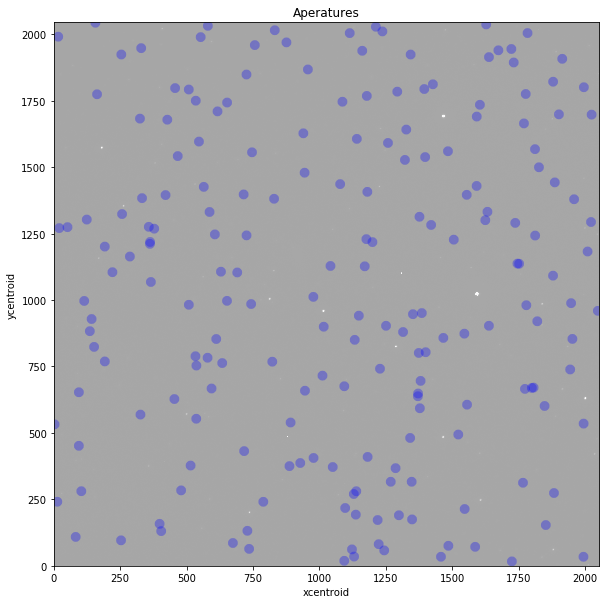

In [36]:
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=9.)
norm = ImageNormalize(stretch=SqrtStretch())

plt.figure(figsize=(15, 10))

plt.imshow(no_biases, cmap=plt.cm.gray, origin='lower', norm=norm)
apertures.plot(color='blue', lw=5, alpha=0.3)

plt.title('Aperatures')
plt.xlabel('xcentroid')
plt.ylabel('ycentroid');

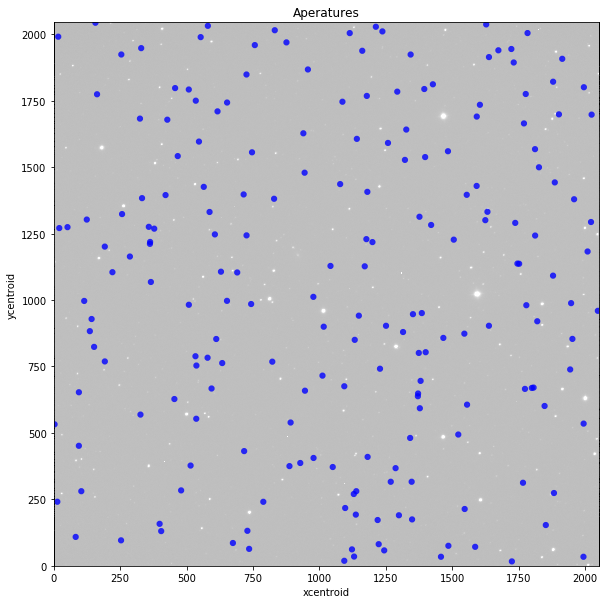

In [37]:
positions = (sources['xcentroid'], sources['ycentroid'])
apertures2 = CircularAperture(positions, r=6.)
norm2 = simple_norm(no_biases, 'log', percent=99.9)

plt.figure(figsize=(15, 10))

plt.imshow(no_biases, cmap=plt.cm.gray, origin='lower', norm=norm2)
apertures2.plot(color='blue', lw=3, alpha=0.8)

plt.title('Aperatures')
plt.xlabel('xcentroid')
plt.ylabel('ycentroid');

# Make the Aperatures

In [38]:
from photutils import aperture_photometry

# Larger ap & ImageNormalize 

In [39]:
phot_table = aperture_photometry(no_biases, apertures, method='subpixel', subpixels=20 , error=True)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)
print(np.average(phot_table['aperture_sum_err']))

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    120580.88 15.952585997260757
  2 1093.6557128411525 18.335225810668483    126970.18 15.952664354270105
  3  1993.906436205487  33.45915290455527    96606.181 15.952977778458791
  4 1130.6080393359805 34.256448737257216    96861.283 15.953134488243995
  5 1457.5720697295646  33.51938933462942    80442.314 15.951645683126241
  6 1243.9299929041968 57.505730235055594    115911.94 15.951959127329784
  7 1122.6224471005341  61.26488813880349    97993.396  15.95203748741834
  8  735.5290095334087 63.215221361347446    111931.49 15.951567321112995
  9 1586.2741547776573  70.92654079474345       101076  15.95109714094927
 10   1485.47539861802  74.80539671458546    121963.79 15.951410595931634
...                ...                

In [40]:
phot_table_100 = aperture_photometry(no_biases, apertures, method='subpixel', subpixels=100 , error=True)
phot_table_100['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table_100)
print(np.average(phot_table_100['aperture_sum_err']))

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    120576.94 15.952194206440694
  2 1093.6557128411525 18.335225810668483    126962.95 15.951965396151033
  3  1993.906436205487  33.45915290455527     96598.27  15.95216913150058
  4 1130.6080393359805 34.256448737257216    96850.746  15.95205315938986
  5 1457.5720697295646  33.51938933462942    80446.644  15.95213151901651
  6 1243.9299929041968 57.505730235055594    115914.28 15.952165997130296
  7 1122.6224471005341  61.26488813880349    97992.596 15.951946589679894
  8  735.5290095334087 63.215221361347446    111937.24 15.952122115881636
  9 1586.2741547776573  70.92654079474345    101085.06  15.95201241223188
 10   1485.47539861802  74.80539671458546    121968.66 15.951918379931612
...                ...                

In [41]:
phot_table2 = aperture_photometry(no_biases, apertures, method='exact', error=True)
phot_table2['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table2)
print(np.average(phot_table2['aperture_sum_err']))

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    120575.88 15.952084658149644
  2 1093.6557128411525 18.335225810668483    126964.16 15.952084658149644
  3  1993.906436205487  33.45915290455527    96597.408 15.952084658149644
  4 1130.6080393359805 34.256448737257216    96850.966 15.952084658149644
  5 1457.5720697295646  33.51938933462942    80446.206 15.952084658149644
  6 1243.9299929041968 57.505730235055594    115913.47 15.952084658149644
  7 1122.6224471005341  61.26488813880349    97994.018 15.952084658149644
  8  735.5290095334087 63.215221361347446    111936.85 15.952084658149644
  9 1586.2741547776573  70.92654079474345    101085.77 15.952084658149644
 10   1485.47539861802  74.80539671458546    121970.34 15.952084658149646
...                ...                

In [42]:
phot_table3 = aperture_photometry(no_biases, apertures, method='center', error=True)
phot_table3['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table3)
print(np.average(phot_table3['aperture_sum_err']))

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    120741.82 15.968719422671311
  2 1093.6557128411525 18.335225810668483    127746.96   16.0312195418814
  3  1993.906436205487  33.45915290455527    96509.307 15.937377450509228
  4 1130.6080393359805 34.256448737257216    96674.839 15.937377450509228
  5 1457.5720697295646  33.51938933462942    80926.436               16.0
  6 1243.9299929041968 57.505730235055594     116435.2               16.0
  7 1122.6224471005341  61.26488813880349    98208.822 15.968719422671311
  8  735.5290095334087 63.215221361347446     112446.6               16.0
  9 1586.2741547776573  70.92654079474345    100909.19 15.937377450509228
 10   1485.47539861802  74.80539671458546    122809.99   16.0312195418814
...                ...                

# Smaller ap & norm

In [43]:
phot_table4 = aperture_photometry(no_biases, apertures2, method='subpixel', subpixels=25 , error=True)
phot_table4['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table4)
print(np.average(phot_table4['aperture_sum_err']))
err4 = np.average(phot_table4['aperture_sum_err'])

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833     74840.02 10.635863857722136
  2 1093.6557128411525 18.335225810668483    80705.807 10.635562984628505
  3  1993.906436205487  33.45915290455527      52783.6 10.634434634713779
  4 1130.6080393359805 34.256448737257216    52170.726 10.635412544889832
  5 1457.5720697295646  33.51938933462942    37373.284 10.634208950363915
  6 1243.9299929041968 57.505730235055594    69914.247 10.635186881291744
  7 1122.6224471005341  61.26488813880349    53034.948 10.635412544889832
  8  735.5290095334087 63.215221361347446    65231.819 10.634735539730173
  9 1586.2741547776573  70.92654079474345    56178.604  10.63345663460382
 10   1485.47539861802  74.80539671458546    75354.345 10.634284179012708
...                ...                

In [44]:
phot_table2_100 = aperture_photometry(no_biases, apertures2, method='subpixel', subpixels=100 , error=True)
phot_table2_100['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table2_100)
print(np.average(phot_table2_100['aperture_sum_err']))
err2_100 = np.average(phot_table2_100['aperture_sum_err'])

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    74831.751 10.634782555369902
  2 1093.6557128411525 18.335225810668483    80699.039 10.634655612665602
  3  1993.906436205487  33.45915290455527    52785.372  10.63467441908778
  4 1130.6080393359805 34.256448737257216    52165.946  10.63472143499772
  5 1457.5720697295646  33.51938933462942    37377.516 10.634838973863216
  6 1243.9299929041968 57.505730235055594    69909.523 10.634617999721476
  7 1122.6224471005341  61.26488813880349    53029.816 10.634683822286396
  8  735.5290095334087 63.215221361347446    65231.241 10.634660314274266
  9 1586.2741547776573  70.92654079474345    56187.489 10.634660314274266
 10   1485.47539861802  74.80539671458546    75356.967  10.63460389483313
...                ...                

In [45]:
phot_table5 = aperture_photometry(no_biases, apertures2, method='exact', error=True)
phot_table5['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table5)
print(np.average(phot_table5['aperture_sum_err']))
err5 = np.average(phot_table5['aperture_sum_err'])

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    74831.293 10.634723105433096
  2 1093.6557128411525 18.335225810668483    80699.555 10.634723105433096
  3  1993.906436205487  33.45915290455527    52785.708 10.634723105433096
  4 1130.6080393359805 34.256448737257216    52165.916 10.634723105433096
  5 1457.5720697295646  33.51938933462942    37376.782 10.634723105433096
  6 1243.9299929041968 57.505730235055594    69910.282 10.634723105433096
  7 1122.6224471005341  61.26488813880349    53030.161 10.634723105433096
  8  735.5290095334087 63.215221361347446    65231.716 10.634723105433096
  9 1586.2741547776573  70.92654079474345    56187.961 10.634723105433096
 10   1485.47539861802  74.80539671458546    75357.843 10.634723105433096
...                ...                

In [46]:
phot_table6 = aperture_photometry(no_biases, apertures2, method='center', error=True)
phot_table6['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table6)
print(np.average(phot_table6['aperture_sum_err']))
err6 = np.average(phot_table6['aperture_sum_err'])

 id      xcenter            ycenter       aperture_sum  aperture_sum_err 
           pix                pix                                        
--- ------------------ ------------------ ------------ ------------------
  1 1724.4471675487314 16.059347043434833    74118.992 10.535653752852738
  2 1093.6557128411525 18.335225810668483     81835.51 10.770329614269007
  3  1993.906436205487  33.45915290455527    52461.881 10.583005244258363
  4 1130.6080393359805 34.256448737257216    52832.379 10.723805294763608
  5 1457.5720697295646  33.51938933462942    38000.792 10.723805294763608
  6 1243.9299929041968 57.505730235055594    69556.655 10.583005244258363
  7 1122.6224471005341  61.26488813880349    53695.877 10.723805294763608
  8  735.5290095334087 63.215221361347446    66321.147 10.770329614269007
  9 1586.2741547776573  70.92654079474345    55553.328 10.535653752852738
 10   1485.47539861802  74.80539671458546    76078.728 10.723805294763608
...                ...                

# Comparisions

In [47]:
print(err4-err2_100)
print(err4 - err5)
print(err4 - err6)
print('')
print(err6-err2_100)
print(err6 - err5)
# err6 is the least!

-2.6001483570681216e-05
-3.188828695854795e-05
0.000357921252748028

-0.0003839227363187092
-0.00038980953970657595


# Get your annulus on...

In [48]:
from photutils import CircularAnnulus

In [49]:
apertures3 = CircularAperture(positions, r=6)
annulus_apertures = CircularAnnulus(positions, r_in=6., r_out=12.)

In [50]:
apers = [apertures3, annulus_apertures]
phot_table7 = aperture_photometry(no_biases, apers, method='center', error=True)
for col in phot_table7.colnames:
    phot_table7[col].info.format = '%.8g'  # for consistent table output
print(phot_table7)

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 1724.4472 16.059347 ...          10.535654      107420.95          18.493242
  2 1093.6557 18.335226 ...           10.77033      106890.42           18.35756
  3 1993.9064 33.459153 ...          10.583005      104848.18          18.493242
  4  1130.608 34.256449 ...          10.723805      105408.59          18.384776
  5 1457.5721 33.519389 ...          10.723805      103329.07          18.384776
  6   1243.93  57.50573 ...          10.583005      108888.96          18.493242
  7 1122.6224 61.264888 ...          10.723805      109419.82          18.384776
  8 735.52901 63.215221 ...           10.77033      109272.69           18.35756
  9 1586.2742 70.926541 ...          10.535654      107591.26          18.520259
 10 1485.4754 74.805397 ... 

In [51]:
bkg_mean = phot_table7['aperture_sum_1'] / annulus_apertures.area()

In [52]:
bkg_sum = bkg_mean * apertures3.area()
final_sum = phot_table7['aperture_sum_0'] - bkg_sum
phot_table7['residual_aperture_sum'] = final_sum
phot_table7['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table7) 

 id  xcenter   ycenter  ... aperture_sum_err_1 residual_aperture_sum
       pix       pix    ...                                         
--- --------- --------- ... ------------------ ---------------------
  1 1724.4472 16.059347 ...          18.493242             38312.009
  2 1093.6557 18.335226 ...           18.35756             46205.371
  3 1993.9064 33.459153 ...          18.493242             17512.488
  4  1130.608 34.256449 ...          18.384776             17696.184
  5 1457.5721 33.519389 ...          18.384776             3557.7685
  6   1243.93  57.50573 ...          18.493242             33260.335
  7 1122.6224 61.264888 ...          18.384776             17222.604
  8 735.52901 63.215221 ...           18.35756             29896.918
  9 1586.2742 70.926541 ...          18.520259             19689.575
 10 1485.4754 74.805397 ...          18.384776             40145.143
...       ...       ... ...                ...                   ...
191 553.16459 1989.3265 ...       

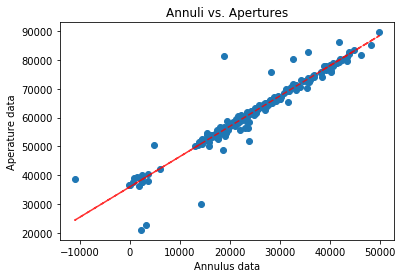

In [53]:
#Plot the data against each other.
x, y = phot_table7['residual_aperture_sum'], phot_table6['aperture_sum']
plt.scatter(x,y)
plt.title('Annuli vs. Apertures')
plt.xlabel('Annulus data')
plt.ylabel('Aperature data')
#1:1 line for the data
plt.plot(x, 1.052*x + 3.597e+04, '--r', alpha=0.8);

In [54]:
#Find the best fit for where the data is 1:1 e.g the same reported value
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x)
print(coefficients)
print(polynomial)

[1.05179236e+00 3.59685668e+04]
 
1.052 x + 3.597e+04


# PSF fitting

In [55]:
from photutils.psf import (IterativelySubtractedPSFPhotometry,
                           BasicPSFPhotometry)
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

In [56]:
bkgrms = MADStdBackgroundRMS()
std = bkgrms(no_biases)

daogroup = DAOGroup(2.0*3)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=3)

photometry = IterativelySubtractedPSFPhotometry(finder=daofind,
                                                group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
result_tab = photometry(image=no_biases)
residual_image = photometry.get_residual_image()                          

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


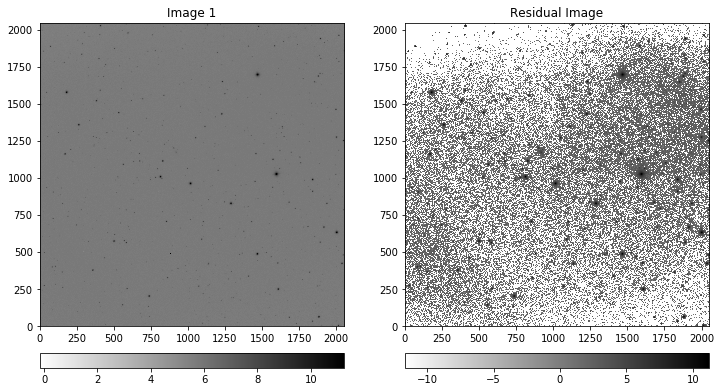

In [57]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(np.log(no_biases), cmap='gray_r', aspect=1, interpolation='nearest',
               origin='lower')
plt.title('Image 1')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(np.log(residual_image), cmap='gray_r', aspect=1,
           interpolation='nearest', origin='lower')
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show();

In [58]:
from astropy.table import Table

In [59]:
psf_model.x_0.fixed =True
psf_model.y_0.fixed =True
pos = Table(names=['x_0','y_0'], data=[sources['xcentroid'],
                                       sources['ycentroid']])
photometry1 = BasicPSFPhotometry(group_maker=daogroup, 
                                bkg_estimator=mmm_bkg, 
                                psf_model=psf_model, 
                                fitter=LevMarLSQFitter(), 
                                fitshape=(11,11))

result_tab1 = photometry1(image=no_biases, init_guesses=pos)
residual_image1 = photometry1.get_residual_image()

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


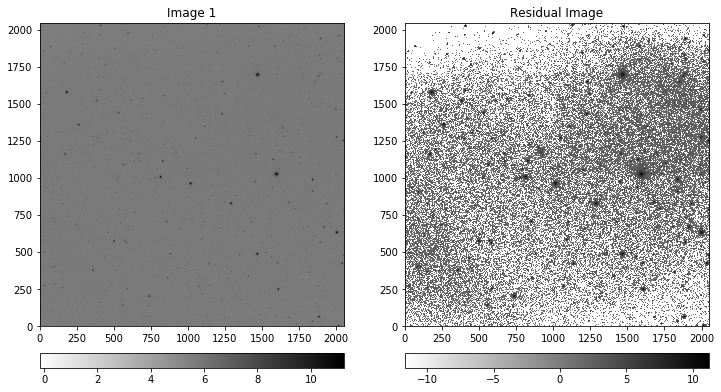

In [60]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(np.log(no_biases), cmap='gray_r', aspect=1, interpolation='nearest',
               origin='lower')
plt.title('Image 1')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(np.log(residual_image1), cmap='gray_r', aspect=1,
           interpolation='nearest', origin='lower')
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show();

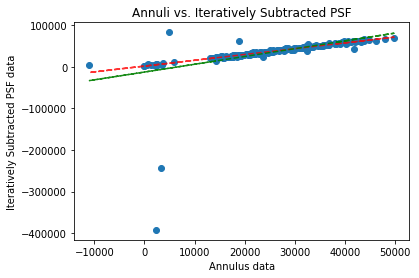

In [61]:
#Plot the data against each other.
x1, y1 = phot_table7['residual_aperture_sum'], result_tab['flux_fit']
plt.scatter(x1,y1)
plt.title('Annuli vs. Iteratively Subtracted PSF')
plt.xlabel('Annulus data')
plt.ylabel('Iteratively Subtracted PSF data')
#1:1 line for the data
plt.plot(x, 1.395*x + 1619, '--r', alpha=0.8);
plt.plot(x, 1.872*x - 1.271e+04, '--g', alpha=0.9);

In [62]:
#Find the best fit for where the data is 1:1 e.g the same reported value
coefficients = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x1)
print(coefficients)
print(polynomial)

[ 1.87167017e+00 -1.27078120e+04]
 
1.872 x - 1.271e+04


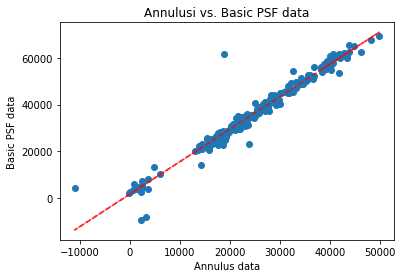

In [63]:
#Plot the data against each other.
x2, y2 = phot_table7['residual_aperture_sum'], result_tab1['flux_fit']
plt.scatter(x2,y2)
plt.title('Annulusi vs. Basic PSF data')
plt.xlabel('Annulus data')
plt.ylabel('Basic PSF data')
#1:1 line for the data
plt.plot(x, 1.395*x + 1619, '--r', alpha=0.8);

In [64]:
#Find the best fit for where the data is 1:1 e.g the same reported value
coefficients = np.polyfit(x2, y2, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x2)
print(coefficients)
print(polynomial)

[1.39483944e+00 1.61873296e+03]
 
1.395 x + 1619


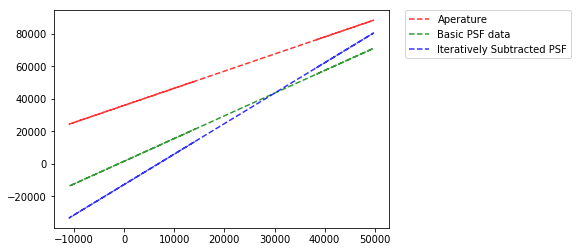

In [65]:
# Are they the same?
plt.plot(x, 1.052*x + 3.597e+04, '--r', alpha=0.8, label="Aperature")
plt.plot(x, 1.395*x + 1619, '--g', alpha=0.8, label="Basic PSF data")
plt.plot(x, 1.872*x - 1.271e+04, '--b', alpha=0.8, label="Iteratively Subtracted PSF")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Recall there was a second filter

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


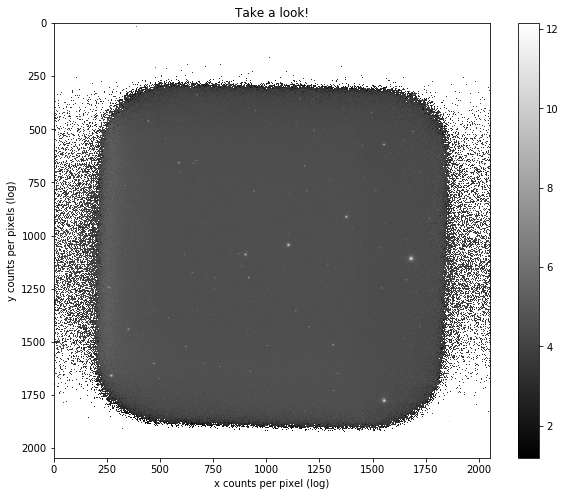

In [66]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(no_Wash), cmap=plt.cm.gray)

plt.title('Take a look!')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

In [67]:
more_trim = np.delete(no_Wash, np.s_[0:501], 0)
more_trim = np.delete(more_trim, np.s_[1150:1900], 0)
more_trim = np.delete(more_trim, np.s_[1750:3000], 1)
more_trim = np.delete(more_trim, np.s_[0:300], 1)
more_trim = np.delete(no_mo_bo, np.s_[1023:1078], 1)

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


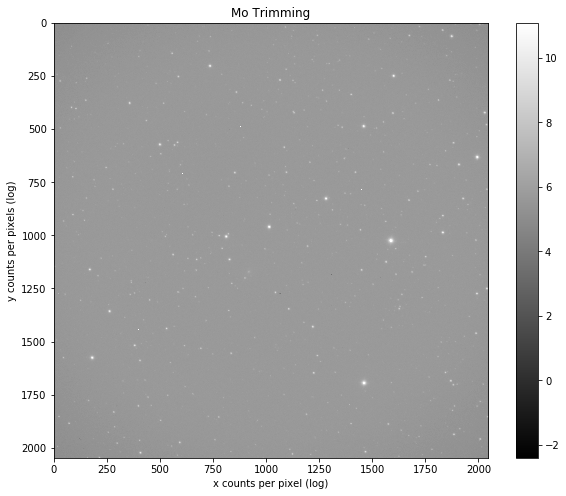

In [68]:
plt.figure(figsize=(10, 8))

plt.imshow(np.log(more_trim), cmap=plt.cm.gray)

plt.title('Mo Trimming')
plt.xlabel('x counts per pixel (log)')
plt.ylabel('y counts per pixels (log)')
plt.colorbar();

In [69]:
#Find'em
daofind2 = DAOStarFinder(fwhm=3.0, threshold=10*std)
sources2 = daofind2(more_trim-median)

for col in sources2.colnames:
    sources2[col].info.format = '%.8g'
    
print(sources2)
len(sources2)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
--- --------- --------- ---------- ... --- --------- --------- ------------
  1 2002.6058 3.7869804 0.43118611 ...   0 6666.8316 20.587948   -3.2840326
  2 1887.5903 5.1577062 0.34135303 ...   0 221.01337 1.1575169  -0.15881839
  3 1960.4284 5.2506294 0.50348624 ...   0 228.64974 1.0636816 -0.067029073
  4 441.07581 9.8544569 0.49278327 ...   0 368.01337 1.4852592  -0.42950559
  5 1719.4474 16.069415  0.4133663 ...   0 970.74065 2.9496197   -1.1744151
  6 1088.6516 18.341802 0.48511435 ...   0 1485.1043 4.5000529   -1.6330441
  7 1828.2881 32.553568 0.41249695 ...   0 3856.2861 11.578083   -2.6590917
  8 1988.8986 33.467584 0.43701059 ...   0 294.19519 1.5046887  -0.44361668
  9 1125.6006 34.259884 0.53917552 ...   0 572.55883 1.8045219  -0.64090539
 10 1452.5698 33.520832 0.67568188 ...   0 648.55883 4.2030196   -1.5589035
...       ...       ...        ... ... ...       ...       ...          ...
506 1465.531

516

In [70]:
bkgrms = MADStdBackgroundRMS()
std3 = bkgrms(more_trim)

daogroup = DAOGroup(2.0*3)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=3)

photometry3 = IterativelySubtractedPSFPhotometry(finder=daofind,
                                                group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
result_tab3 = photometry3(image=more_trim)
residual_image3 = photometry.get_residual_image()   

/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


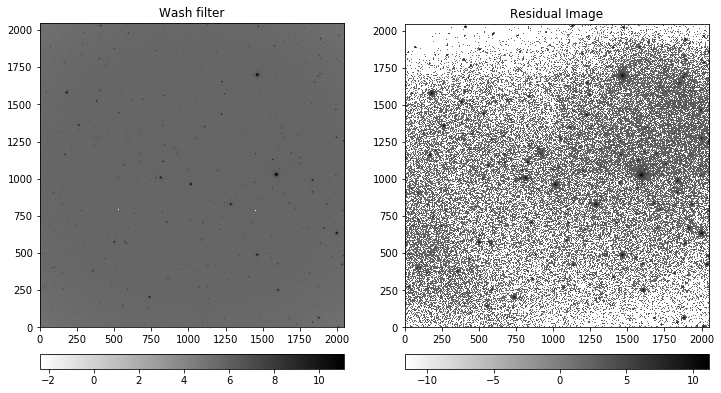

In [71]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(np.log(more_trim), cmap='gray_r', aspect=1, interpolation='nearest',
               origin='lower')
plt.title('Wash filter')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(np.log(residual_image3), cmap='gray_r', aspect=1,
           interpolation='nearest', origin='lower')
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show();

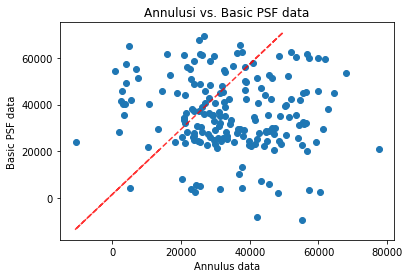

In [78]:
#Plot the data against each other.
x3, y3 = result_tab3['flux_fit'][0:187], result_tab1['flux_fit'][0:187]
plt.scatter(x3,y3)
plt.title('Annulusi vs. Basic PSF data')
plt.xlabel('Annulus data')
plt.ylabel('Basic PSF data')
#1:1 line for the data
plt.plot(x, 1.395*x + 1619, '--r', alpha=0.8);

In [73]:
result_tab3['flux_fit']

32666.575075881865
52116.35605753502
-10590.627255789674
39909.370454746684
31205.27524732753
43369.602864583554
18151.782188241345
10624.593679527276
44664.40372969294
32626.314092572502
28339.418909364424


In [369]:
y3

53916.35007266412
62491.74795903684
23980.574890927353
22781.749077844095
4030.2585988150972
47326.30402091255
24084.701785367484
40179.196905380006
28089.86942897142
54820.289156982355
26302.902641996756
